# پیاده سازی تابع داده شده و مشخص  نمودن متغیرهای عمومی

In [1]:
import numpy as np

#Global covarince
covariance = np.array([[1.,0.],[0.,1.]])

#Global dimension
d = 2

#Implement the probability of Multivarint normal distribution
def multivariate_normal(x,mean):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))


# باز کردن فایل و ذخیره کردن مختصات های x_1 و x_2 به صورت دو تایی در یک لیست

In [2]:
import csv
with open("data1.csv", "r") as file:
    
    #Read csv file
    reader = csv.reader(file, delimiter=',')
    
    #Make list of points
    points = []
    
    #For loop for appending points to their list
    for row in reader:
        points.append([row[0],row[1]])

# انتصاب داده ها به هر یک از توزیع ها بر حسب احتمال تعلق آنها به هر یک از توزیع ها

In [3]:
#Make a list for points of first distribution
distribution1 = []

#Make a list for points of second distribution
distribution2 = []

#Make a list of probabilities that points belong to the first distribution
Probability_distribution1 = []

#Make a list of probabilities that points belong to the second distribution
Probability_distribution2 = []

#Mean of the first distribution
mean1 = np.array([5.,5.])

#Mean of the second distribution
mean2 = np.array([2.,2.])

#For loop for processing and assign each point to one distribution by comparison, the probability of belonging to each of the distributions
for point in range(0,len(points)-1) :
    
    #Make a 1*2 vector from points with float type
    x = np.array([float(points[point+1][0]),float(points[point+1][1])])

    #If-statement for assigning a point to the first distribution
    if multivariate_normal(x,mean1) > multivariate_normal(x,mean2) : 
        Probability_distribution1.append(multivariate_normal(x,mean1))
        Probability_distribution2.append(multivariate_normal(x,mean2))
        distribution1.append(x)
        
    #If-statement for assigning a point to the second distribution
    if multivariate_normal(x,mean2) > multivariate_normal(x,mean1) :
        Probability_distribution1.append(multivariate_normal(x,mean1))
        Probability_distribution2.append(multivariate_normal(x,mean2))
        distribution2.append(x)
        
#Convert lists to numpy arrays 
distribution1 = np.asarray(distribution1)
distribution2 = np.asarray(distribution2)

#Convert lists to numpy arrays
Probability_distribution1 = np.asarray(Probability_distribution1)
Probability_distribution2 = np.asarray(Probability_distribution2)

# نمایش داده ها انتصاب شده در مرحله قبل در یک نمودار با دو رنگ متفاوت

<function matplotlib.pyplot.show(close=None, block=None)>

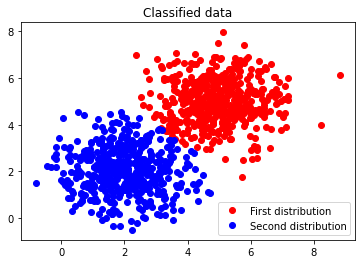

In [4]:
import matplotlib.pyplot as plt

#Showing points of the first distribution
plt.plot(distribution1[:,0],distribution1[:,1],'ro',label = "First distribution")

#Showing points of the second distribution
plt.plot(distribution2[:,0],distribution2[:,1],'bo',label ="Second distribution")

#Determine the position of the chart guide
plt.legend(loc = "lower right")

#Specify the subject of the chart
plt.title("Classified data")

#Show chart
plt.show



# محاسبه تابع شباهت و لاگ تابع شباهت برای هر دو توزیع

In [5]:
#Implement the Likelihood Function 
def Likelihood(Probabilities) : 
    return np.prod(Probabilities)

#Implement the Log Likelihood Function
def LogLikelihood(Probabilities):
    return np.sum(np.log(Probabilities))

#Apply the Likelihood Function to the first distribution
print(Likelihood(Probability_distribution1))


#Apply the Log Likelihood Function to the first distribution
print(LogLikelihood(Probability_distribution1))


#Apply the Likelihood Function to the second distribution
print(Likelihood(Probability_distribution2))


#Apply the Log Likelihood Function to the second distribution
print(LogLikelihood(Probability_distribution2))

0.0
-7254.811516924357
0.0
-7239.434376472873
